<a href="https://colab.research.google.com/github/probml/probml-notebooks/blob/main/notebooks/hbayes_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make figures for hierarchical Bayesian regression models


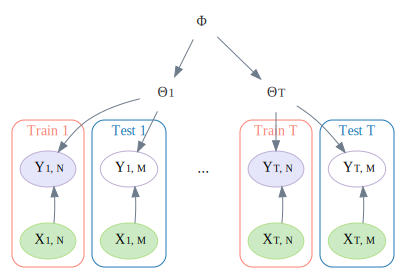

In [3]:
import graphviz

dot = graphviz.Digraph(format='pdf')


def create_node(dot, character, subscript, color='white', fill_color="white", fontcolor="black", is_greek_letter=False):
    if is_greek_letter:
        dot.node(f'{character}{subscript}',
                 f"<&{character};<FONT POINT-SIZE='12'><SUB>{subscript}</SUB></FONT>>",
                 color=color, fontcolor=fontcolor)
    else:
        dot.node(f'{character}{subscript}',
                 f"<{character}<FONT POINT-SIZE='10'><SUB>{subscript}</SUB></FONT>>",
                 style='filled', color=color, fillcolor=fill_color, fontcolor=fontcolor)


def create_subgraph(dot, hidden, observable, subscript, name, label="", color="grey", bgcolor="white",
                    edge_color="black"):
    dot.edge(f'{hidden}{subscript}',
             f'{observable}{subscript}',
             style='invis')

    with dot.subgraph(name=name) as c:
        c.attr(style='rounded', color=color, bgcolor=bgcolor, label=label, fontcolor=color)
        c.edge(f'{observable}{subscript}', f'{hidden}{subscript}', color=edge_color)


subscripts_0 = ['1', 'T']

train_subscript, test_subscript = 'N', 'M'
subscripts_1 = [train_subscript, test_subscript]

subgraph_labels = ['Train', 'Test']
subgraph_colors = ["/set34/4", "/paired3/2"]

edge_color = "lightsteelblue4"
fontcolor = "grey17"
hid_color, hid_fill_color = "/accent3/2", "lavender"
obs_color, obs_fill_color = "/paired3/3", "/pastel19/3"

param, hidden, observabale = 'Theta', 'Y', 'X'

dot.node('phi', '<&Phi;>', color="white", fontcolor=fontcolor)

for i, subscript in enumerate(subscripts_0):
    create_node(dot, param, subscript, color='white', fontcolor=fontcolor, is_greek_letter=True)
    dot.edge('phi', f'{param}{subscript}', color=edge_color)

for i, s0 in enumerate(subscripts_0):
    for k, (s1, label, color) in enumerate(zip(subscripts_1, subgraph_labels, subgraph_colors)):
        subscript = f'{s0}, {s1}'
        dot.attr(rank="same")

        if s1 == 'N':
            create_node(dot, hidden, subscript, color=hid_color, fill_color=hid_fill_color)
        else:
            create_node(dot, hidden, subscript, color=hid_color)

        subgraph_idx = i * len(subscripts_0) + k
        subgraph_label = f"{label} {s0}"
        subgraph_name = f"cluster_{subgraph_idx}"

        create_node(dot, observabale, subscript, color=obs_color, fill_color=obs_fill_color)
        dot.edge(f'Theta{s0}', f'{hidden}{subscript}', color=edge_color)

        create_subgraph(dot, hidden, observabale, subscript,
                        name=subgraph_name, label=subgraph_label,
                        color=color, edge_color=edge_color)

    if i == 0:
        dot.node(f'blank{i}', "...", color="white")
        dot.edge(f'Theta{s0}', f'blank{i}', style="invis")

file_name = 'hbayes-multi-task'
dot.render(file_name, view=True)

dot

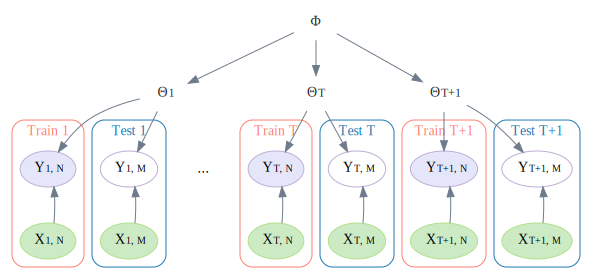

In [4]:
import graphviz

dot = graphviz.Digraph(format='pdf')


def create_node(dot, character, subscript, color='white', fill_color="white", fontcolor="black", is_greek_letter=False):
    if is_greek_letter:
        dot.node(f'{character}{subscript}',
                 f"<&{character};<FONT POINT-SIZE='12'><SUB>{subscript}</SUB></FONT>>",
                 color=color, fontcolor=fontcolor)
    else:
        dot.node(f'{character}{subscript}',
                 f"<{character}<FONT POINT-SIZE='10'><SUB>{subscript}</SUB></FONT>>",
                 style='filled', color=color, fillcolor=fill_color, fontcolor=fontcolor)


def create_subgraph(dot, hidden, observable, subscript, name, label="", color="grey", bgcolor="white",
                    edge_color="black"):
    dot.edge(f'{hidden}{subscript}',
             f'{observable}{subscript}',
             style='invis')

    with dot.subgraph(name=name) as c:
        c.attr(style='rounded', color=color, bgcolor=bgcolor, label=label, fontcolor=color)
        c.edge(f'{observable}{subscript}', f'{hidden}{subscript}', color=edge_color)


subscripts_0 = ['1', 'T', 'T+1']

train_subscript, test_subscript = 'N', 'M'
subscripts_1 = [train_subscript, test_subscript]

subgraph_labels = ['Train', 'Test']
subgraph_colors = ["/set34/4", "/paired3/2"]

edge_color = "lightsteelblue4"
fontcolor = "grey17"
hid_color, hid_fill_color = "/accent3/2", "lavender"
obs_color, obs_fill_color = "/paired3/3", "/pastel19/3"

param, hidden, observabale = 'Theta', 'Y', 'X'

dot.node('phi', '<&Phi;>', color="white", fontcolor=fontcolor)

for i, subscript in enumerate(subscripts_0):
    create_node(dot, param, subscript, color='white', fontcolor=fontcolor, is_greek_letter=True)
    dot.edge('phi', f'{param}{subscript}', color=edge_color)

for i, s0 in enumerate(subscripts_0):
    for k, (s1, label, color) in enumerate(zip(subscripts_1, subgraph_labels, subgraph_colors)):
        subscript = f'{s0}, {s1}'
        dot.attr(rank="same")

        if s1 == 'N':
            create_node(dot, hidden, subscript, color=hid_color, fill_color=hid_fill_color)
        else:
            create_node(dot, hidden, subscript, color=hid_color)

        subgraph_idx = i * len(subscripts_0) + k
        subgraph_label = f"{label} {s0}"
        subgraph_name = f"cluster_{subgraph_idx}"

        create_node(dot, observabale, subscript, color=obs_color, fill_color=obs_fill_color)
        dot.edge(f'Theta{s0}', f'{hidden}{subscript}', color=edge_color)

        create_subgraph(dot, hidden, observabale, subscript,
                        name=subgraph_name, label=subgraph_label,
                        color=color, edge_color=edge_color)

    if i == 0:
        dot.node(f'blank{i}', "...", color="white")
        dot.edge(f'Theta{s0}', f'blank{i}', style="invis")

file_name = 'hbayes-multi-task-plus1'
dot.render(file_name, view=True)

dot